Chargement et prétraitement des données :

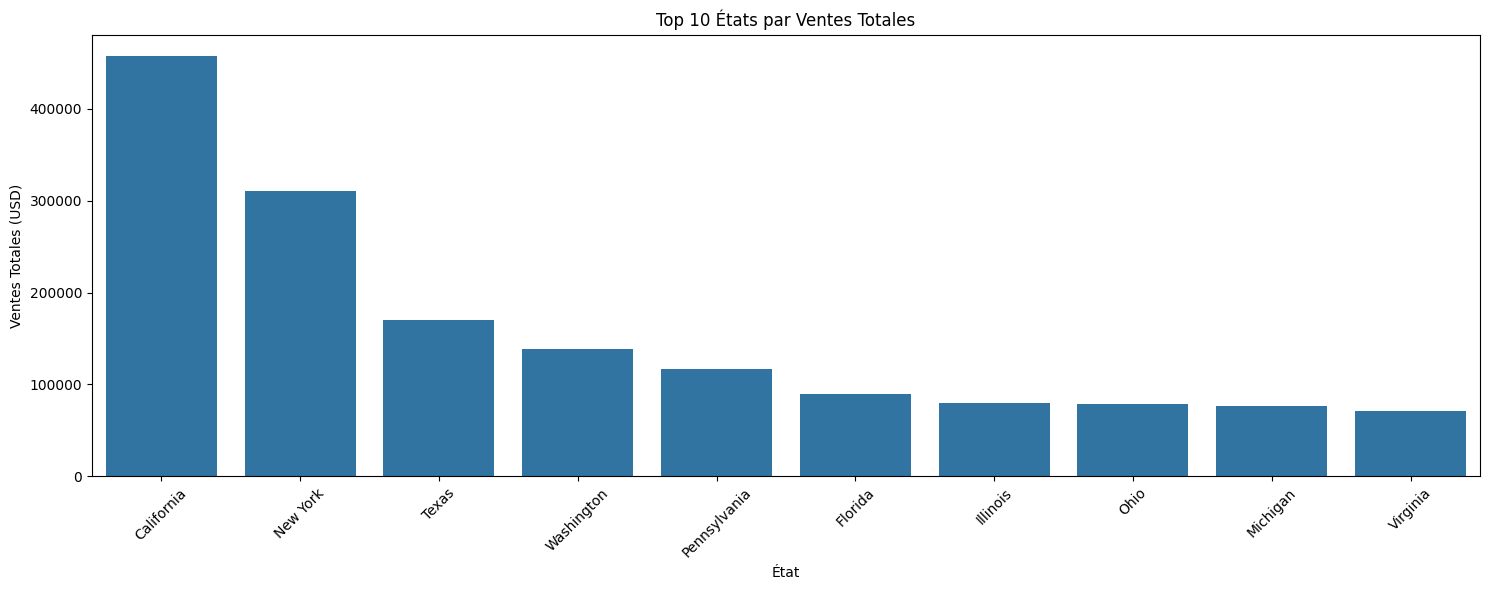

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données
df = pd.read_excel('./WEEK_2/DAY_5/DATASET/US Superstore data.xls')

# 1. États avec le plus de ventes
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=state_sales.head(10).index, y=state_sales.head(10).values)
plt.title('Top 10 États par Ventes Totales')
plt.xlabel('État')
plt.ylabel('Ventes Totales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparaison New York vs California

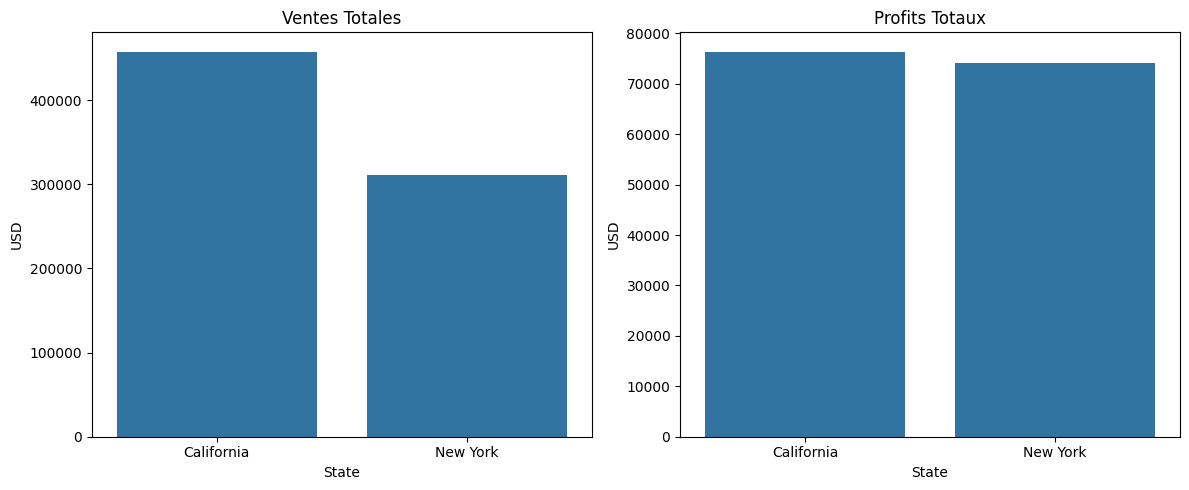


Comparaison détaillée NY vs CA:
                Sales    Profit
State                          
California  457687.63  76381.39
New York    310876.27  74038.55


In [3]:
# 2. Comparaison New York vs California
ny_ca_comparison = df[df['State'].isin(['New York', 'California'])].groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).round(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=ny_ca_comparison.index, y=ny_ca_comparison['Sales'], ax=ax1)
ax1.set_title('Ventes Totales')
ax1.set_ylabel('USD')

sns.barplot(x=ny_ca_comparison.index, y=ny_ca_comparison['Profit'], ax=ax2)
ax2.set_title('Profits Totaux')
ax2.set_ylabel('USD')

plt.tight_layout()
plt.show()

print("\nComparaison détaillée NY vs CA:")
print(ny_ca_comparison)

Question 3 : Meilleur client à New York

In [4]:
# Filtrage pour NY
ny_customers = df[df['State'] == 'New York'].groupby('Customer Name').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=False)

print("Top 5 clients à New York par ventes:")
print(ny_customers.head())

Top 5 clients à New York par ventes:
                      Sales     Profit
Customer Name                         
Tom Ashbrook      13723.498  4599.2073
Peter Fuller       7678.228   543.2819
Seth Vernon        7359.918  1571.7964
Tom Boeckenhauer   6999.960  2239.9872
Greg Tran          6712.744   774.7935


In [ ]:
Différences de rentabilité entre états

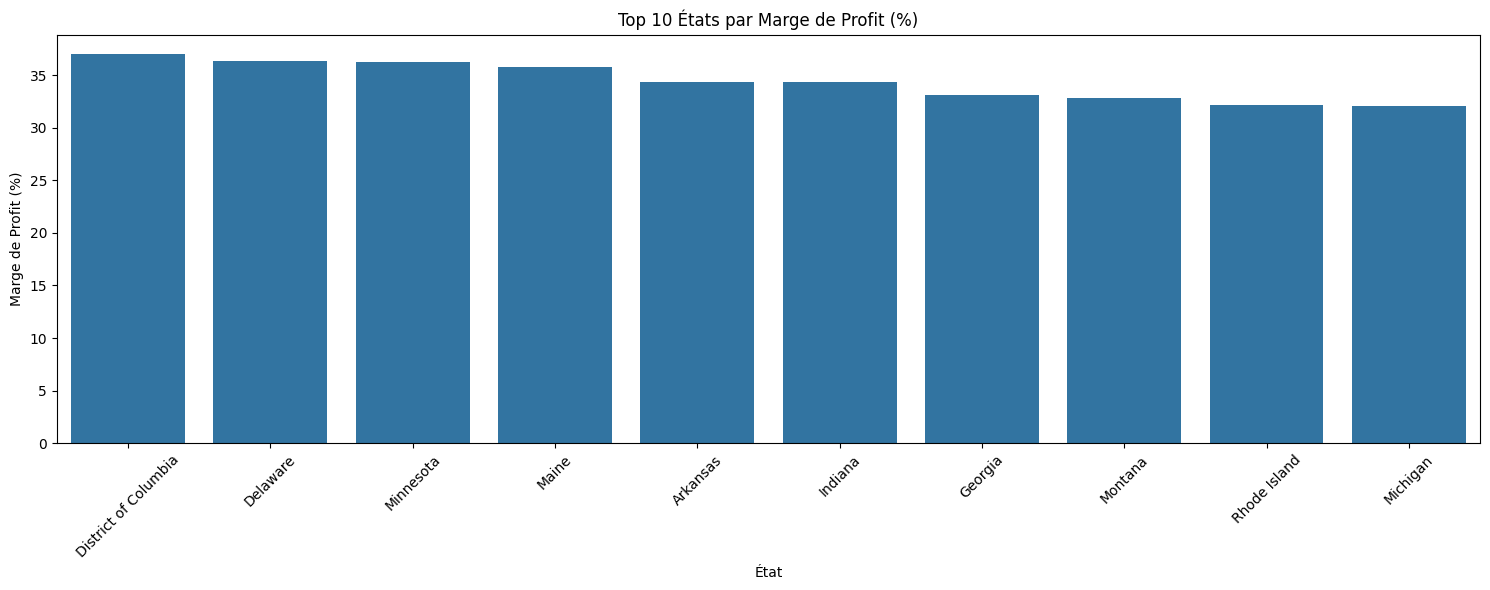

In [5]:
# Calcul de la rentabilité par état
state_profitability = df.groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
state_profitability['Profit_Margin'] = (state_profitability['Profit'] / state_profitability['Sales'] * 100).round(2)

# Visualisation
plt.figure(figsize=(15, 6))
sns.barplot(x=state_profitability.sort_values('Profit_Margin', ascending=False).head(10).index,
            y=state_profitability.sort_values('Profit_Margin', ascending=False).head(10)['Profit_Margin'])
plt.title('Top 10 États par Marge de Profit (%)')
plt.xlabel('État')
plt.ylabel('Marge de Profit (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Principe de Pareto pour les clients et le profit

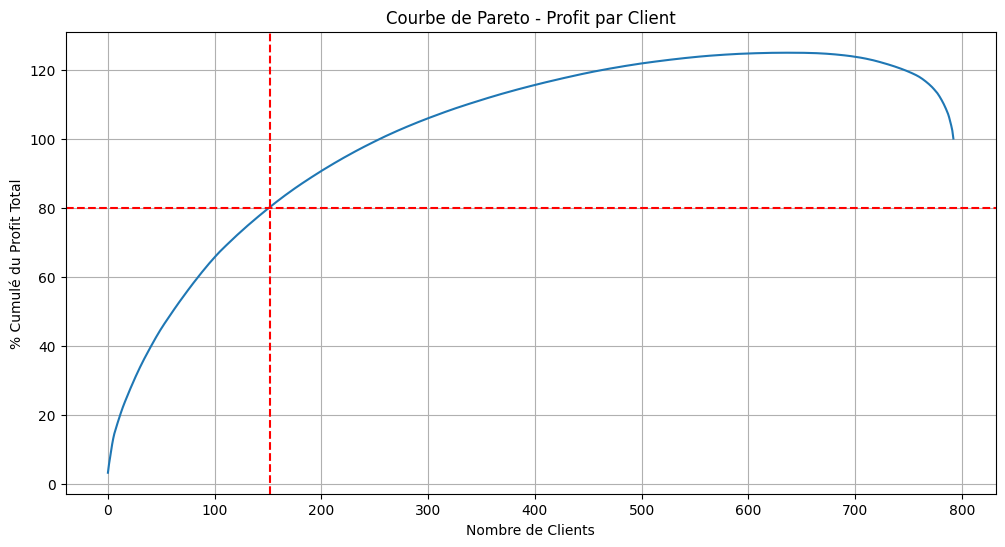


19.2% des clients génèrent 80% du profit


In [6]:
# Calcul du profit cumulé par client
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
total_profit = customer_profit.sum()
cumulative_profit_pct = (customer_profit.cumsum() / total_profit * 100)

# Nombre de clients représentant 80% du profit
n_customers = len(customer_profit)
n_customers_80 = len(cumulative_profit_pct[cumulative_profit_pct <= 80])
pareto_pct = (n_customers_80 / n_customers * 100)

plt.figure(figsize=(12, 6))
plt.plot(range(len(cumulative_profit_pct)), cumulative_profit_pct)
plt.axhline(y=80, color='r', linestyle='--')
plt.axvline(x=n_customers_80, color='r', linestyle='--')
plt.title('Courbe de Pareto - Profit par Client')
plt.xlabel('Nombre de Clients')
plt.ylabel('% Cumulé du Profit Total')
plt.grid(True)
plt.show()

print(f"\n{pareto_pct:.1f}% des clients génèrent 80% du profit")

Top 20 villes par Ventes et par Profit

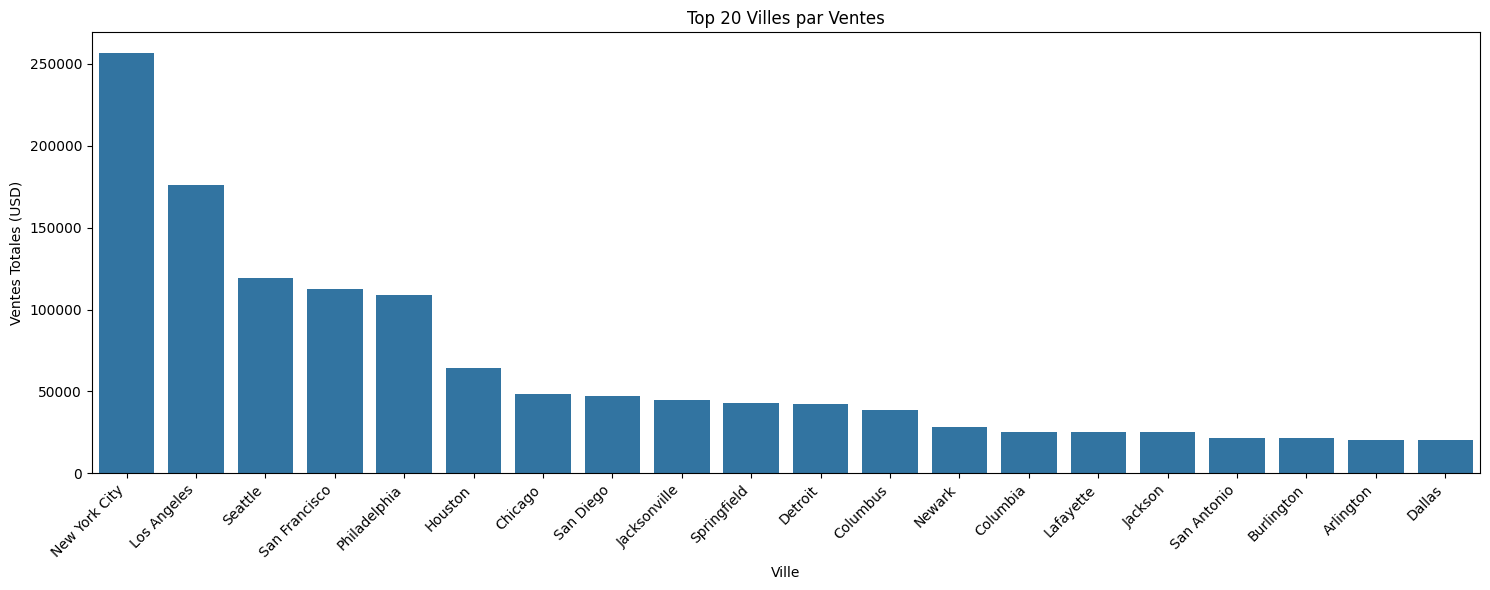

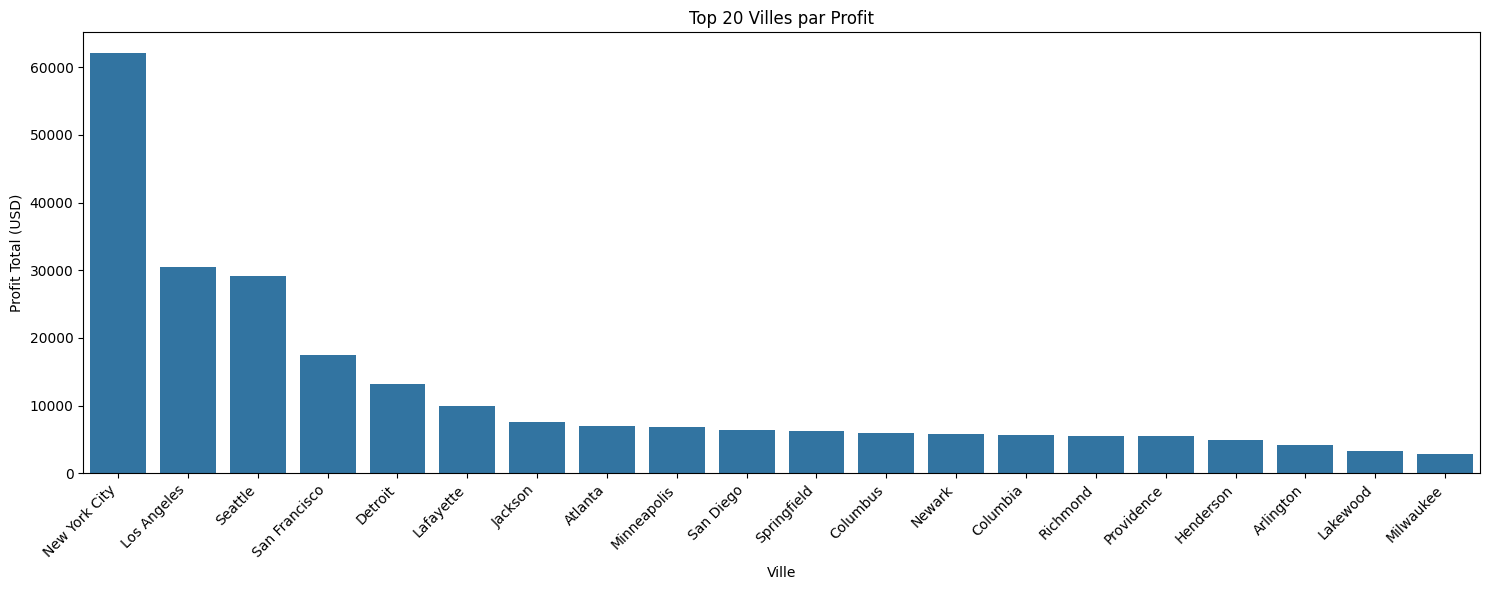


Comparaison des marges pour les top 20 villes par ventes :
City
Lafayette        40.02
Detroit          31.05
Jackson          30.37
Seattle          24.39
New York City    24.20
Columbia         22.17
Arlington        20.63
Newark           20.27
Los Angeles      17.31
San Francisco    15.54
Columbus         15.24
Springfield      14.40
San Diego        13.42
Jacksonville     -5.20
Philadelphia    -12.69
Chicago         -13.71
Dallas          -14.14
Houston         -15.74
Burlington      -16.72
San Antonio     -33.42
Name: Profit_Margin, dtype: float64


In [7]:
# Top 20 villes par ventes
city_sales = df.groupby('City').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).round(2)

# Calcul de la marge par ville
city_sales['Profit_Margin'] = (city_sales['Profit'] / city_sales['Sales'] * 100).round(2)

# Visualisation des ventes
plt.figure(figsize=(15, 6))
top_20_sales = city_sales.nlargest(20, 'Sales')
sns.barplot(x=top_20_sales.index, y=top_20_sales['Sales'])
plt.title('Top 20 Villes par Ventes')
plt.xlabel('Ville')
plt.ylabel('Ventes Totales (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisation des profits
plt.figure(figsize=(15, 6))
top_20_profit = city_sales.nlargest(20, 'Profit')
sns.barplot(x=top_20_profit.index, y=top_20_profit['Profit'])
plt.title('Top 20 Villes par Profit')
plt.xlabel('Ville')
plt.ylabel('Profit Total (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nComparaison des marges pour les top 20 villes par ventes :")
print(top_20_sales['Profit_Margin'].sort_values(ascending=False))


Top 20 clients par Ventes

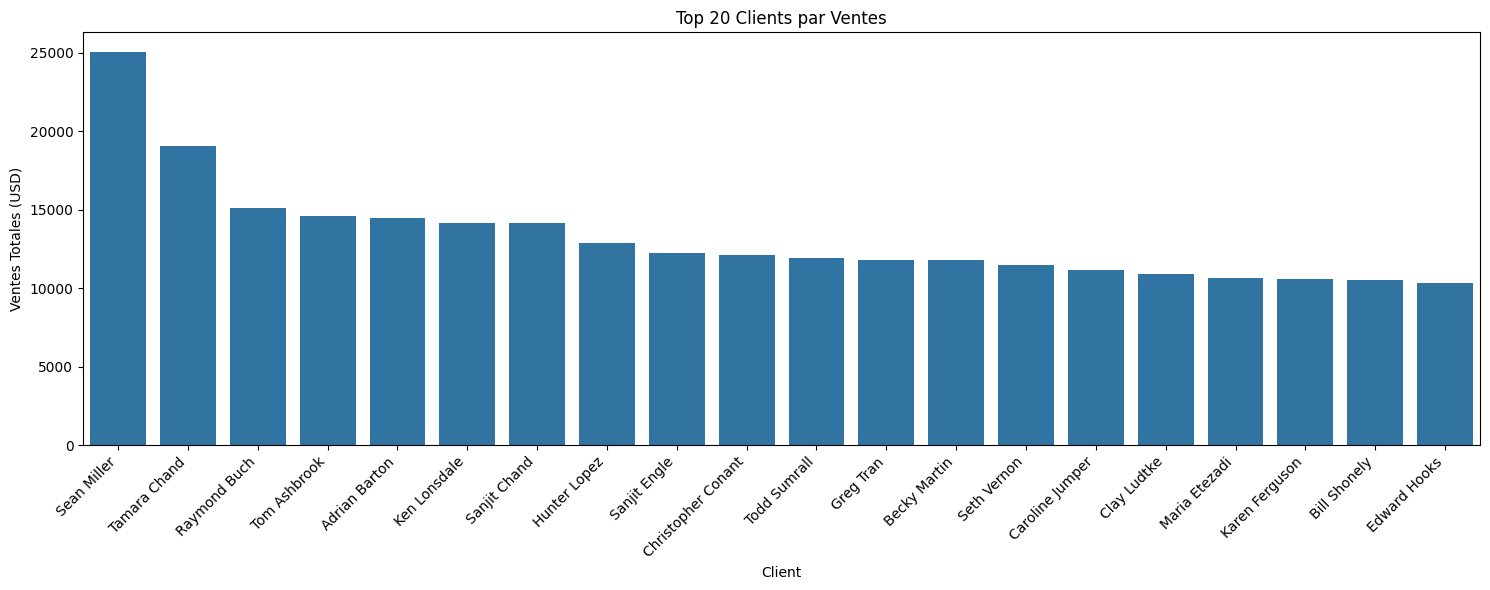

In [8]:
# Top 20 clients par ventes
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=customer_sales.head(20).index, y=customer_sales.head(20).values)
plt.title('Top 20 Clients par Ventes')
plt.xlabel('Client')
plt.ylabel('Ventes Totales (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Courbe cumulative des ventes par client (Principe de Pareto)

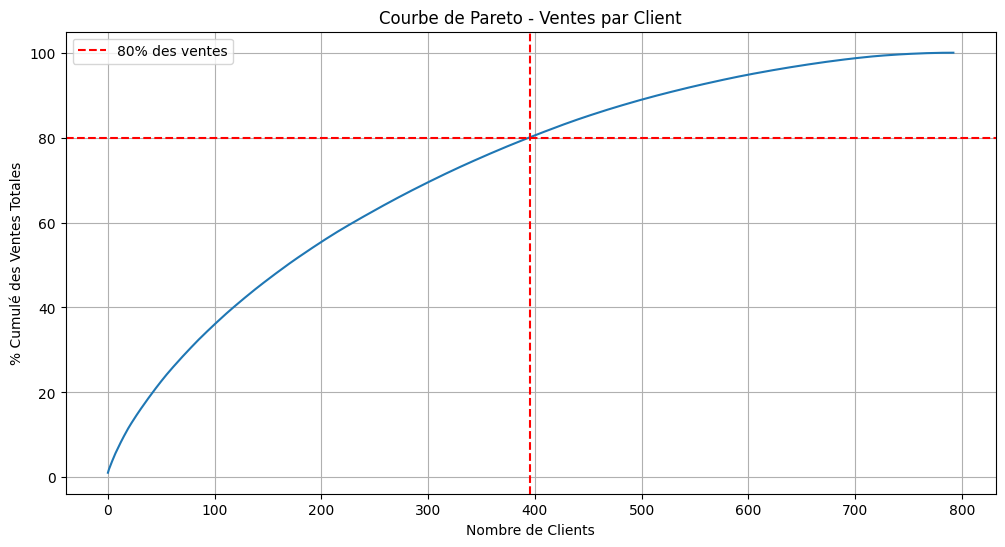


49.8% des clients génèrent 80% des ventes, le principe ne s'applique pas ici


In [11]:
# Calcul des ventes cumulées
total_sales = customer_sales.sum()
cumulative_sales_pct = (customer_sales.cumsum() / total_sales * 100)

# Calcul du nombre de clients pour 80% des ventes
n_customers = len(customer_sales)
n_customers_80 = len(cumulative_sales_pct[cumulative_sales_pct <= 80])
pareto_sales_pct = (n_customers_80 / n_customers * 100)

plt.figure(figsize=(12, 6))
plt.plot(range(len(cumulative_sales_pct)), cumulative_sales_pct)
plt.axhline(y=80, color='r', linestyle='--', label='80% des ventes')
plt.axvline(x=n_customers_80, color='r', linestyle='--')
plt.title('Courbe de Pareto - Ventes par Client')
plt.xlabel('Nombre de Clients')
plt.ylabel('% Cumulé des Ventes Totales')
plt.grid(True)
plt.legend()
plt.show()

print(f"\n{pareto_sales_pct:.1f}% des clients génèrent 80% des ventes, le principe ne s'applique pas ici")

Recommandations pour les stratégies marketing

In [10]:
print("RECOMMANDATIONS STRATÉGIQUES MARKETING\n")

# Analyse des états les plus performants
top_states = state_sales.head(5)
print("États prioritaires pour le marketing :")
for state, sales in top_states.items():
    print(f"- {state}: {sales:,.2f} USD")

# Analyse des villes les plus performantes
print("\nVilles prioritaires pour le marketing :")
for city, data in top_20_profit.head(5).iterrows():
    print(f"- {city}: Profit de {data['Profit']:,.2f} USD, Marge de {data['Profit_Margin']}%")

print("\nRecommandations spécifiques :")
print("""
1. Concentration géographique :
   - Prioriser les campagnes marketing dans les états les plus rentables
   - Développer des stratégies spécifiques pour les villes à forte marge

2. Segmentation client :
   - Identifier et cibler les clients à fort potentiel
   - Développer des programmes de fidélisation pour les top clients

3. Optimisation des ressources :
   - Allouer le budget marketing en fonction des performances régionales
   - Adapter les stratégies selon les spécificités locales
""")


RECOMMANDATIONS STRATÉGIQUES MARKETING

États prioritaires pour le marketing :
- California: 457,687.63 USD
- New York: 310,876.27 USD
- Texas: 170,188.05 USD
- Washington: 138,641.27 USD
- Pennsylvania: 116,511.91 USD

Villes prioritaires pour le marketing :
- New York City: Profit de 62,036.98 USD, Marge de 24.2%
- Los Angeles: Profit de 30,440.76 USD, Marge de 17.31%
- Seattle: Profit de 29,156.10 USD, Marge de 24.39%
- San Francisco: Profit de 17,507.39 USD, Marge de 15.54%
- Detroit: Profit de 13,181.79 USD, Marge de 31.05%

Recommandations spécifiques :

1. Concentration géographique :
   - Prioriser les campagnes marketing dans les états les plus rentables
   - Développer des stratégies spécifiques pour les villes à forte marge

2. Segmentation client :
   - Identifier et cibler les clients à fort potentiel
   - Développer des programmes de fidélisation pour les top clients

3. Optimisation des ressources :
   - Allouer le budget marketing en fonction des performances régionales